## import stuff

In [2]:
#importing things
import pandas as pd
import numpy as np
import csv
import pylab as pl
import matplotlib.pyplot as plt
import copy
import scipy
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import sem
from scipy.linalg import hadamard
from scipy.stats import pearsonr
from scipy.stats import ttest_ind_from_stats
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import ttest_ind_from_stats
from collections import OrderedDict
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.colors as mc
import colorsys
from matplotlib.ticker import FixedLocator, FixedFormatter

def lighten_color(color, amount=0.5):  
    # --------------------- SOURCE: @IanHincks ---------------------
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


def sum_digits(digit):
    return sum(int(x) for x in digit if x.isdigit())

## fetch the data & add some parameters

In [3]:
CH65_all = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/20221008_CH65_QCfilt_REPfilt.csv',delimiter=',',dtype={'geno': str}))
CH65_all['som_mut'] = CH65_all['geno'].apply(sum_digits)
CH65_all

,geno,repa_x,repb_x,MA90_mean,MA90_sem,repa_y,repb_y,SI06_mean,SI06_sem,repa,...,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16,som_mut
0,0000000000000000,8.612721,8.490826,8.551773,0.060948,6.0,6.0,6.0,0.0,6.000000,...,0,0,0,0,0,0,0,0,0,0
1,0000000000000001,8.631980,8.533384,8.582682,0.049298,6.0,6.0,6.0,0.0,6.000000,...,0,0,0,0,0,0,0,0,1,1
2,0000000000000010,8.340245,8.305612,8.322928,0.017317,6.0,6.0,6.0,0.0,6.000000,...,0,0,0,0,0,0,0,1,0,1
3,0000000000000011,8.511183,8.454330,8.482757,0.028426,6.0,6.0,6.0,0.0,6.000000,...,0,0,0,0,0,0,0,1,1,2
4,0000000000000100,8.552056,8.546097,8.549076,0.002980,6.0,6.0,6.0,0.0,6.000000,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,1100100111010000,NaN,NaN,NaN,NaN,6.0,6.0,6.0,0.0,7.967819,...,1,1,1,0,1,0,0,0,0,7
65531,1100110111111010,NaN,NaN,NaN,NaN,6.0,6.0,6.0,0.0,9.823908,...,1,1,1,1,1,1,0,1,0,11
65532,1111010111011110,NaN,NaN,NaN,NaN,6.0,6.0,6.0,0.0,6.000000,...,1,1,1,0,1,1,1,1,0,12
65533,0001010111101111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.054181,...,1,1,1,1,0,1,1,1,1,10


In [4]:
germ_MA90 = float(CH65_all['MA90_mean'].values[CH65_all['geno']=='0000000000000000'])
germ_SI06 = float(CH65_all['SI06_mean'].values[CH65_all['geno']=='0000000000000000'])
germ_G189E = float(CH65_all['G189E_mean'].values[CH65_all['geno']=='0000000000000000'])
germ_MA90_e = float(CH65_all['MA90_sem'].values[CH65_all['geno']=='0000000000000000'])
germ_SI06_e = float(CH65_all['SI06_sem'].values[CH65_all['geno']=='0000000000000000'])
germ_G189E_e = float(CH65_all['G189E_sem'].values[CH65_all['geno']=='0000000000000000'])
I2_MA90 = float(CH65_all['MA90_mean'].values[CH65_all['geno']=='0000001010100000'])
I2_SI06 = float(CH65_all['SI06_mean'].values[CH65_all['geno']=='0000001010100000'])
I2_G189E = float(CH65_all['G189E_mean'].values[CH65_all['geno']=='0000001010100000'])
I2_MA90_e = float(CH65_all['MA90_sem'].values[CH65_all['geno']=='0000001010100000'])
I2_SI06_e = float(CH65_all['SI06_sem'].values[CH65_all['geno']=='0000001010100000'])
I2_G189E_e = float(CH65_all['G189E_sem'].values[CH65_all['geno']=='0000001010100000'])
som_MA90 = float(CH65_all['MA90_mean'].values[CH65_all['geno']=='1111111111111111'])
som_SI06 = float(CH65_all['SI06_mean'].values[CH65_all['geno']=='1111111111111111'])
som_G189E = float(CH65_all['G189E_mean'].values[CH65_all['geno']=='1111111111111111'])
som_MA90_e = float(CH65_all['MA90_sem'].values[CH65_all['geno']=='1111111111111111'])
som_SI06_e = float(CH65_all['SI06_sem'].values[CH65_all['geno']=='1111111111111111'])
som_G189E_e = float(CH65_all['G189E_sem'].values[CH65_all['geno']=='1111111111111111'])
germline = ([germ_MA90,germ_MA90_e,germ_SI06,germ_SI06_e,germ_G189E,germ_G189E_e])
i2 = ([I2_MA90,I2_MA90_e,I2_SI06,I2_SI06_e,I2_G189E,I2_G189E_e])
somatic = ([som_MA90,som_MA90_e,som_SI06,som_SI06_e,som_G189E,som_G189E_e])
print(germline)
print(i2)
print(somatic)

[8.55177343972209, 0.0609477282779096, 6.0, 0.0, 6.0, 0.0]
[9.02695218077918, 0.03039007677918, 6.0, 0.0, 7.916462144026996, 0.1143217938602965]
[10.10262723065802, 0.0232714693419806, 9.345456422452052, 0.0671929766798546, 9.748962402406168, 0.1464491536347205]


## Box plots by number of mutations

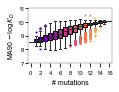

In [8]:
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.25
flierprops = dict(marker='o', markersize=1,linestyle='none')
fig, ax = plt.subplots(figsize=(1.5,1))      
sns.boxplot(x="som_mut", y="MA90_mean", data=CH65_all,palette='plasma', saturation=1,
            flierprops=flierprops, linewidth=1,ax=ax)

plt.xlabel("# mutations",fontsize=7)
plt.ylabel("MA90 $-\log K_D$",fontsize=7,labelpad=0)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labelsize=6)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    labelsize=6,
    pad=0.5)
y_locator = FixedLocator([7,8,9,10,11])
ax.yaxis.set_major_locator(y_locator)
ax.set_yticklabels(['7','8','9','10','11'])
plt.ylim(7,11)
x_locator = FixedLocator([0,2,4,6,8,10,12,14,16])
ax.xaxis.set_major_locator(x_locator)
ax.set_xticklabels(['0','2','4','6','8','10','12','14','16'])

import matplotlib.patches
box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor("k")

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        if line.get_marker() != '':
            line.set_color(col)
            line.set_mfc(col)  # facecolor of fliers
            line.set_mec(col)  # edgecolor of fliers
            
plt.savefig('20220603_CH65_MA90_box_bymut.png', transparent=True, dpi=600,bbox_inches='tight')

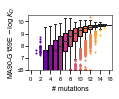

In [7]:
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=1)
fig, ax = plt.subplots(figsize=(1.5,1))      
sns.boxplot(x="som_mut", y="G189E_mean", data=CH65_all,palette='plasma', saturation=1,
            flierprops=flierprops, linewidth=1,ax=ax)

plt.xlabel("# mutations",fontsize=7)
plt.ylabel("MA90-G189E $-\log K_D$",fontsize=7,labelpad=0)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labelsize=6)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    labelsize=6,
    pad=0.5)
y_locator = FixedLocator([6,7,8,9,10])
ax.yaxis.set_major_locator(y_locator)
ax.set_yticklabels(['≤6','7','8','9','10'])
plt.ylim(6,10.5)
plt.axhline(y=6,linestyle='dashed',linewidth=0.5,color='black')
x_locator = FixedLocator([0,2,4,6,8,10,12,14,16])
ax.xaxis.set_major_locator(x_locator)
ax.set_xticklabels(['0','2','4','6','8','10','12','14','16'])

import matplotlib.patches
box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor("k")

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        if line.get_marker() != '':
            line.set_color(col)
            line.set_mfc(col)  # facecolor of fliers
            line.set_mec(col)  # edgecolor of fliers
            
plt.savefig('20220603_CH65_G189E_box_bymut.png', transparent=True, dpi=600,bbox_inches='tight')

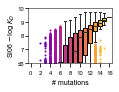

In [9]:
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=1)
fig, ax = plt.subplots(figsize=(1.5,1))      
sns.boxplot(x="som_mut", y="SI06_mean", data=CH65_all,palette='plasma', saturation=1,
            flierprops=flierprops, linewidth=1,ax=ax)

plt.xlabel("# mutations",fontsize=7)
plt.ylabel("SI06 $-\log K_D$",fontsize=7,labelpad=0)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labelsize=6)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    labelsize=6,
    pad=0.5)
y_locator = FixedLocator([6,7,8,9,10])
ax.yaxis.set_major_locator(y_locator)
ax.set_yticklabels(['≤6','7','8','9','10'])
plt.ylim(6,10)
plt.axhline(y=6,linestyle='dashed',linewidth=0.5,color='black')
x_locator = FixedLocator([0,2,4,6,8,10,12,14,16])
ax.xaxis.set_major_locator(x_locator)
ax.set_xticklabels(['0','2','4','6','8','10','12','14','16'])

import matplotlib.patches
box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor("k")

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        if line.get_marker() != '':
            line.set_color(col)
            line.set_mfc(col)  # facecolor of fliers
            line.set_mec(col)  # edgecolor of fliers
plt.savefig('20220603_CH65_SI06_box_bymut.png', transparent=True, dpi=600,bbox_inches='tight')

## Pleiotropy scatter plots

/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_22443/1943157194.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['8','9','10'])
/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_22443/1943157194.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['≤ 6','7','8','9','10'])


<Figure size 432x288 with 0 Axes>

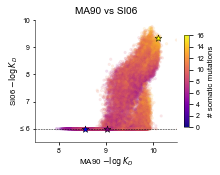

In [5]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
cmap=plt.cm.plasma
plt.clf()
# plot
x = CH65_all['MA90_mean']
y = CH65_all['SI06_mean']
plt.rcParams['grid.color'] = "white"
fig = plt.figure(figsize=(2.75,2.25))
ax = fig.add_subplot()
x_locator = FixedLocator([8,9,10])
y_locator = FixedLocator([6,7,8,9,10])
ax.set_xticklabels(['8','9','10'])
ax.set_yticklabels(['≤ 6','7','8','9','10'])
ax.xaxis.set_major_locator(x_locator)
ax.yaxis.set_major_locator(y_locator)
plt.axvline(x=6,linestyle='dashed',linewidth=0.5,color='black')
plt.axhline(y=6,linestyle='dashed',linewidth=0.5,color='black')
ax.scatter(x,y, c=CH65_all['som_mut'], cmap=cmap, s=5, alpha = 0.1, zorder=-10000)
germ=ax.scatter(germ_MA90,germ_SI06, s=50,c='blue', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=99999999)
I2=ax.scatter(I2_MA90,I2_SI06,s=50,c='purple', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
som=ax.scatter(som_MA90,som_SI06,s=50,c='yellow', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
ax.yaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.xaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.set_xlim([7.5, 10.5])
ax.set_ylim([5.5, 10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('MA90 $-\log K_D$',fontsize=8,labelpad=1)
plt.ylabel('SI06 $-\log K_D$',fontsize=8,labelpad=0)
plt.title('MA90 vs SI06',fontsize=10)
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin = 0, vmax=16))
sm._A = []
cbar = plt.colorbar(sm,fraction=0.03, pad=0.05,orientation='vertical',aspect=20,ticks=[0,2,4,6,8,10,12,14,16])
cbar.set_label(label='# somatic mutations',size=8)
cbar.ax.tick_params(labelsize=7)
plt.savefig("20220603_CH65_MA90_SI06.png", transparent=True, dpi=600,bbox_inches='tight')

/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_21575/3014379421.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['8','9','10'])
/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_21575/3014379421.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['≤ 6','7','8','9','10'])


<Figure size 432x288 with 0 Axes>

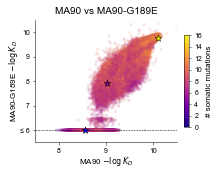

In [61]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
cmap=plt.cm.plasma
plt.clf()
# plot
x = CH65_all['MA90_mean']
y = CH65_all['G189E_mean']
plt.rcParams['grid.color'] = "white"
fig = plt.figure(figsize=(2.75,2.25))
ax = fig.add_subplot()
x_locator = FixedLocator([8,9,10])
y_locator = FixedLocator([6,7,8,9,10])
ax.set_xticklabels(['8','9','10'])
ax.set_yticklabels(['≤ 6','7','8','9','10'])
ax.xaxis.set_major_locator(x_locator)
ax.yaxis.set_major_locator(y_locator)
plt.axvline(x=6,linestyle='dashed',linewidth=0.5,color='black')
plt.axhline(y=6,linestyle='dashed',linewidth=0.5,color='black')
ax.scatter(x,y, c=CH65_all['som_mut'], cmap=cmap, s=5, alpha = 0.1, zorder=-10000)
germ=ax.scatter(germ_MA90,germ_G189E, s=50,c='blue', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=99999999)
I2=ax.scatter(I2_MA90,I2_G189E,s=50,c='purple', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
som=ax.scatter(som_MA90,som_G189E,s=50,c='yellow', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
ax.yaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.xaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.set_xlim([7.5, 10.5])
ax.set_ylim([5.5, 10.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('MA90 $-\log K_D$',fontsize=8,labelpad=1)
plt.ylabel('MA90-G189E $-\log K_D$',fontsize=8,labelpad=0)
plt.title('MA90 vs MA90-G189E',fontsize=10)
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin = 0, vmax=16))
sm._A = []
cbar = plt.colorbar(sm,fraction=0.03, pad=0.05,orientation='vertical',aspect=20,ticks=[0,2,4,6,8,10,12,14,16])
cbar.set_label(label='# somatic mutations',size=8)
cbar.ax.tick_params(labelsize=7)
plt.savefig("images/20220603_CH65_MA90_G189E.png", transparent=True, dpi=600,bbox_inches='tight')

/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_21575/3254389314.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['≤ 6','7','8','9','10'])
/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_21575/3254389314.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['≤ 6','7','8','9','10'])


<Figure size 432x288 with 0 Axes>

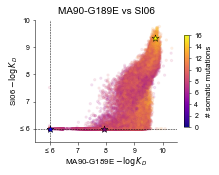

In [62]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
cmap=plt.cm.plasma
plt.clf()
# plot
x = CH65_all['G189E_mean']
y = CH65_all['SI06_mean']
plt.rcParams['grid.color'] = "white"
fig = plt.figure(figsize=(2.75,2.25))
ax = fig.add_subplot()
x_locator = FixedLocator([6,7,8,9,10])
y_locator = FixedLocator([6,7,8,9,10])
ax.set_xticklabels(['≤ 6','7','8','9','10'])
ax.set_yticklabels(['≤ 6','7','8','9','10'])
ax.xaxis.set_major_locator(x_locator)
ax.yaxis.set_major_locator(y_locator)
plt.axvline(x=6,linestyle='dashed',linewidth=0.5,color='black')
plt.axhline(y=6,linestyle='dashed',linewidth=0.5,color='black')
ax.scatter(x,y, c=CH65_all['som_mut'], cmap=cmap, s=5, alpha = 0.1, zorder=-10000)
germ=ax.scatter(germ_G189E,germ_SI06, s=50,c='blue', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=99999999)
I2=ax.scatter(I2_G189E,I2_SI06,s=50,c='purple', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
som=ax.scatter(som_G189E,som_SI06,s=50,c='yellow', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
ax.yaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.xaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.set_xlim([5.5, 10.5])
ax.set_ylim([5.5, 10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('MA90-G189E $-\log K_D$',fontsize=8,labelpad=1)
plt.ylabel('SI06 $-\log K_D$',fontsize=8,labelpad=0)
plt.title('MA90-G189E vs SI06',fontsize=10)
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin = 0, vmax=16))
sm._A = []
cbar = plt.colorbar(sm,fraction=0.03, pad=0.05,orientation='vertical',aspect=20,ticks=[0,2,4,6,8,10,12,14,16])
cbar.set_label(label='# somatic mutations',size=8)
cbar.ax.tick_params(labelsize=7)
plt.savefig("images/20220603_CH65_G189E_SI06.png", transparent=True, dpi=600,bbox_inches='tight')

/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_21575/3502865813.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['8','9','10'])
/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_21575/3502865813.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['≤ 6','7','8','9',10])
/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_21575/3502865813.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels(['≤ 6','7','8','9','10'])


65535


<Figure size 432x288 with 0 Axes>

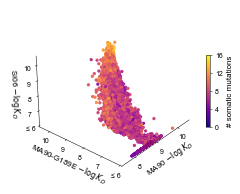

In [63]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
cmap=plt.cm.plasma
plt.clf()
# plot
x = CH65_all['MA90_mean']
y = CH65_all['G189E_mean']
z = CH65_all['SI06_mean']
plt.rcParams['grid.color'] = "white"
fig = plt.figure(figsize=(3.25,4))
ax = fig.add_subplot(111, projection='3d')
x_locator = FixedLocator([8,9,10])
ax.set_xticklabels(['8','9','10'])
y_locator = FixedLocator([6,7,8,9,10])
ax.set_yticklabels(['≤ 6','7','8','9',10])
z_locator = FixedLocator([6,7,8,9,10])
ax.set_zticklabels(['≤ 6','7','8','9','10'])
ax.xaxis.set_major_locator(x_locator)
ax.yaxis.set_major_locator(y_locator)
ax.zaxis.set_major_locator(z_locator)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.scatter(x,y,z, c=CH65_all['som_mut'], cmap=cmap, s=5, alpha = 1, zorder=-10000)
ax.view_init(30, 220)
ax.zaxis.set_tick_params(labelsize=7,pad=-3,length=2.5)
ax.yaxis.set_tick_params(labelsize=7,pad=-3,length=2.5)
ax.xaxis.set_tick_params(labelsize=7,pad=-3,length=2.5)
ax.set_xlim([7.5, 10.5])
ax.set_ylim([6, 10.5])
ax.set_zlim([6, 10.5])

plt.xlabel('MA90 $-\log K_D$',fontsize=8,labelpad=-8)
plt.ylabel('MA90-G189E $-\log K_D$',fontsize=8,labelpad=-8)
ax.set_zlabel('SI06 $-\log K_D$',fontsize=8,labelpad=-8,rotation=180)
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin = 0, vmax=16))
sm._A = []
cbar = plt.colorbar(sm,fraction=0.02, pad=0.05,orientation='vertical',aspect=20,ticks=[0,4,8,12,16])
cbar.set_label(label='# somatic mutations',size=8)
cbar.ax.tick_params(labelsize=7)
print(y.shape[0])
plt.savefig("images/20220603_MA90_G189E_SI06.png", transparent=True, dpi=600,bbox_inches='tight')

## histograms

In [64]:
CH65_all.head()

,geno,repa_x,repb_x,MA90_mean,MA90_sem,repa_y,repb_y,SI06_mean,SI06_sem,repa,...,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16,som_mut
0,0000000000000000,8.612721,8.490826,8.551773,0.060948,6.0,6.0,6.0,0.0,6.0,...,0,0,0,0,0,0,0,0,0,0
1,0000000000000001,8.631980,8.533384,8.582682,0.049298,6.0,6.0,6.0,0.0,6.0,...,0,0,0,0,0,0,0,0,1,1
2,0000000000000010,8.340245,8.305612,8.322928,0.017317,6.0,6.0,6.0,0.0,6.0,...,0,0,0,0,0,0,0,1,0,1
3,0000000000000011,8.511183,8.454330,8.482757,0.028426,6.0,6.0,6.0,0.0,6.0,...,0,0,0,0,0,0,0,1,1,2
4,0000000000000100,8.552056,8.546097,8.549076,0.002980,6.0,6.0,6.0,0.0,6.0,...,0,0,0,0,0,0,1,0,0,1


65530


/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_21575/3764618025.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  MA90_bind_plot['mean'] = MA90_bind_plot.mean(axis=1)


<Figure size 432x288 with 0 Axes>

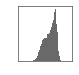

In [65]:
MA90_bind = CH65_all[CH65_all['MA90_mean']>6].copy()
print(MA90_bind['MA90_mean'].count())
MA90_bind_plot = MA90_bind[['geno','repa_x','repb_x']].copy()
MA90_bind_plot['mean'] = MA90_bind_plot.mean(axis=1)
plt.clf()
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['axes.linewidth'] = 0.5
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
x = MA90_bind_plot['mean']
fig = plt.figure(figsize=(0.97,1))
ax = fig.add_subplot()
ax.hist(-x,bins=50,color='dimgray')
ax.yaxis.set_tick_params(labelsize=7,pad=1,length=2.5,width=0)
ax.xaxis.set_tick_params(labelsize=7,pad=1,length=2.5,width=0)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.xaxis.set_major_locator(x_locator)
#ax.yaxis.set_major_formatter(formatter)
ax.set_xlim([-7, -11])
plt.xlabel('  ',fontsize=8,labelpad=1)
plt.ylabel(' ',fontsize=8,labelpad=1)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText=True)
ax.yaxis.get_offset_text().set_fontsize(7)
#plt.title('MA90',fontsize=8)
plt.savefig("images/20220614_MA90binders_hist.png", transparent=True, dpi=600,bbox_inches='tight')

33095


/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_21575/1099083777.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  SI06_bind_plot['mean'] = SI06_bind_plot.mean(axis=1)


<Figure size 432x288 with 0 Axes>

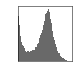

In [66]:
SI06_bind = CH65_all[CH65_all['SI06_mean']>6].copy()
print(SI06_bind['SI06_mean'].count())
SI06_bind_plot = SI06_bind[['geno','repa_y','repb_y']].copy()
SI06_bind_plot['mean'] = SI06_bind_plot.mean(axis=1)
plt.clf()
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['axes.linewidth'] = 0.5
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
x = SI06_bind_plot['mean']
fig = plt.figure(figsize=(0.97,1))
ax = fig.add_subplot()
ax.hist(-x,bins=50,color='dimgray')
ax.yaxis.set_tick_params(labelsize=7,pad=1,length=2.5,width=0)
ax.xaxis.set_tick_params(labelsize=7,pad=1,length=2.5,width=0)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.xaxis.set_major_locator(x_locator)
#ax.yaxis.set_major_formatter(formatter)
ax.set_xlim([-6, -10])
plt.xlabel('  ',fontsize=8,labelpad=1)
plt.ylabel(' ',fontsize=8,labelpad=1)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText=True)
ax.yaxis.get_offset_text().set_fontsize(7)
#plt.title('SI06',fontsize=8)
plt.savefig("images/20220614_SI06binders_hist.png", transparent=True, dpi=600,bbox_inches='tight')

54388


/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_21575/3939596113.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  G189E_bind_plot['mean'] = G189E_bind_plot.mean(axis=1)


<Figure size 432x288 with 0 Axes>

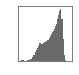

In [67]:
G189E_bind = CH65_all[CH65_all['G189E_mean']>6].copy()
print(G189E_bind['G189E_mean'].count())
G189E_bind_plot = G189E_bind[['geno','repa','repb']].copy()
G189E_bind_plot['mean'] = G189E_bind_plot.mean(axis=1)
plt.clf()
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['axes.linewidth'] = 0.5
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
x = G189E_bind_plot['mean']
fig = plt.figure(figsize=(0.97,1))
ax = fig.add_subplot()
ax.hist(-x,bins=50,color='dimgray')
ax.yaxis.set_tick_params(labelsize=7,pad=1,length=2.5,width=0)
ax.xaxis.set_tick_params(labelsize=7,pad=1,length=2.5,width=0)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.xaxis.set_major_locator(x_locator)
#ax.yaxis.set_major_formatter(formatter)
ax.set_xlim([-6, -10.5])
plt.xlabel('  ',fontsize=8,labelpad=1)
plt.ylabel(' ',fontsize=8,labelpad=1)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText=True)
ax.yaxis.get_offset_text().set_fontsize(7)
#plt.title('G189E',fontsize=8)
plt.savefig("images/20220614_G189Ebinders_hist.png", transparent=True, dpi=600,bbox_inches='tight')

## mutation frequency amongst binders

In [68]:
#calculate mean frequency amongst binders for each antigen
toplot = CH65_all[CH65_all['SI06_mean']>=9].copy()
print(toplot.shape[0])
SI06 = []
posi = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
for pos in range(1,17):
    mean = toplot['pos%s'% pos].mean()*100
    SI06.append(mean)
toplot = CH65_all[CH65_all['MA90_mean']>=9].copy()
print(toplot.shape[0])
MA90 = []
for pos in range(1,17):
    mean = toplot['pos%s'% pos].mean()*100
    MA90.append(mean)
toplot = CH65_all[CH65_all['G189E_mean']>=9].copy()
print(toplot.shape[0])
G189E = []
for pos in range(1,17):
    mean = toplot['pos%s'% pos].mean()*100
    G189E.append(mean)
print(MA90, SI06, G189E)

1017
51528
27337
[49.88549914609533, 51.21487346685297, 62.32339698804533, 49.757413445117216, 55.70369507840397, 50.39784195000776, 52.04743052321068, 55.35825182425089, 50.18048439683279, 53.16138798323242, 58.381850644309885, 50.08539046731874, 50.54921596025462, 50.09897531439218, 49.04906070485949, 51.46910417637013] [72.86135693215338, 76.007866273353, 30.48180924287119, 73.35299901671584, 87.80727630285152, 55.75221238938053, 79.35103244837758, 73.94296951819076, 75.90953785644051, 91.83874139626353, 100.0, 51.2291052114061, 45.624385447394296, 51.32743362831859, 73.74631268436578, 92.92035398230088] [49.12389801368109, 56.45827998683104, 68.1457365475363, 51.35896404140908, 64.03043494165416, 49.551889380692835, 61.4698028313275, 60.24801551011449, 52.4197973442587, 58.52141785857995, 81.62929363134214, 50.67125141749278, 49.932326151369935, 50.58345831656729, 48.45447561912427, 56.871639170355195]


In [69]:
#bootstrap to get error
Nbootstrap = 10
#MA90
bs_df = pd.DataFrame()
for bootstrap in range(Nbootstrap):
    means = []
    CH65_all['MA90_mean_%s' % bootstrap]= np.random.normal(
                        (CH65_all["MA90_mean"]).values.astype('float32'),
                        (CH65_all["MA90_sem"]).values.astype('float32'))
    binders = CH65_all[CH65_all['MA90_mean_%s' % bootstrap]>=9].copy()
    for pos in range(1,17):
        mean = binders['pos%s'% pos].mean()*100
        means.append(mean)
    bs_df['bs_%s' % bootstrap] = means
MA90err = list(bs_df.std(axis=1))
print(MA90err)

#G189E
bs_df = pd.DataFrame()
for bootstrap in range(Nbootstrap):
    means = []
    CH65_all['G189E_mean_%s' % bootstrap]= np.random.normal(
                        (CH65_all["G189E_mean"]).values.astype('float32'),
                        (CH65_all["G189E_sem"]).values.astype('float32'))
    binders = CH65_all[CH65_all['G189E_mean_%s' % bootstrap]>=9].copy()
    for pos in range(1,17):
        mean = binders['pos%s'% pos].mean()*100
        means.append(mean)
    bs_df['bs_%s' % bootstrap] = means
G189Eerr = list(bs_df.std(axis=1))
print(G189Eerr)

#SI06
bs_df = pd.DataFrame()
for bootstrap in range(Nbootstrap):
    means = []
    CH65_all['SI06_mean_%s' % bootstrap]= np.random.normal(
                        (CH65_all["SI06_mean"]).values.astype('float32'),
                        (CH65_all["SI06_sem"]).values.astype('float32'))
    binders = CH65_all[CH65_all['SI06_mean_%s' % bootstrap]>=9].copy()
    for pos in range(1,17):
        mean = binders['pos%s'% pos].mean()*100
        means.append(mean)
    bs_df['bs_%s' % bootstrap] = means
SI06err = list(bs_df.std(axis=1))
print(SI06err)
CH65=pd.DataFrame(list(zip(posi, MA90, MA90err, SI06, SI06err, G189E, G189Eerr)),
              columns=['position','MA90', 'MA90err', 'SI06', 'SI06err','G189E', 'G189Eerr'])
CH65

[0.027522709367680177, 0.016348190196199444, 0.027112361959039436, 0.024622819432035793, 0.019337529155829227, 0.016052284838106185, 0.015822685639913004, 0.033857957555698336, 0.0224750536219735, 0.03675424096628734, 0.020047187815388168, 0.03213278648857532, 0.022819966662240662, 0.031082541925783455, 0.024642042493553205, 0.02532853255999315]
[0.046117419114263467, 0.04664837285145656, 0.031475984315517444, 0.0532375725045508, 0.060522930649793624, 0.05236453478914444, 0.05495872960395734, 0.06379775235331435, 0.04593137074628505, 0.04702916019461964, 0.057737988606751826, 0.0405505593221042, 0.053634928110297866, 0.058138003607247725, 0.04969629256209783, 0.053676188662649546]
[0.6494373981657892, 0.33156134778538376, 0.7744654938397285, 0.2683209547515879, 0.4625659702719976, 0.7428834792795262, 0.46901884542014344, 0.6105331893575342, 0.5675749411182258, 0.5621782377985114, 0.0, 0.49058399431875344, 0.530424164226676, 0.5140810526865217, 0.5937273493441413, 0.5772645488095504]


,position,MA90,MA90err,SI06,SI06err,G189E,G189Eerr
0,N26D,49.885499,0.027523,72.861357,0.649437,49.123898,0.046117
1,S29R,51.214873,0.016348,76.007866,0.331561,56.458280,0.046648
2,Y35N,62.323397,0.027112,30.481809,0.774465,68.145737,0.031476
3,Y48C,49.757413,0.024623,73.352999,0.268321,51.358964,0.053238
4,D49Y,55.703695,0.019338,87.807276,0.462566,64.030435,0.060523
5,V98I,50.397842,0.016052,55.752212,0.742883,49.551889,0.052365
6,G31D,52.047431,0.015823,79.351032,0.469019,61.469803,0.054959
7,Y33H,55.358252,0.033858,73.942970,0.610533,60.248016,0.063798
8,M34I,50.180484,0.022475,75.909538,0.567575,52.419797,0.045931
9,H35N,53.161388,0.036754,91.838741,0.562178,58.521418,0.047029


In [70]:
#do a two-sided t-test to see if mean of bs data is different from 50%
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
from scipy.stats import ttest_ind_from_stats
for mutation in mutation_names:
    result = ttest_ind_from_stats(mean1=CH65.loc[CH65['position']==mutation, 'MA90'].iloc[0], std1=CH65.loc[CH65['position']==mutation, 'MA90err'].iloc[0], nobs1=10,
                     mean2=55, std2=0, nobs2=10, equal_var=False)
    print(mutation,result)

N26D Ttest_indResult(statistic=-587.6409759355777, pvalue=6.092785453773387e-22)
S29R Ttest_indResult(statistic=-732.1679606751871, pvalue=8.42062873040862e-23)
Y35N Ttest_indResult(statistic=854.1717880141724, pvalue=2.1034970460886247e-23)
Y48C Ttest_indResult(statistic=-673.2987824471179, pvalue=1.790461956138364e-22)
D49Y Ttest_indResult(statistic=115.07567528794134, pvalue=1.4348680580955274e-15)
V98I Ttest_indResult(statistic=-906.6186986357703, pvalue=1.2303518604422403e-23)
G31D Ttest_indResult(statistic=-590.0922706189368, pvalue=5.868749560963144e-22)
Y33H Ttest_indResult(statistic=33.46013233903705, pvalue=9.373378798914265e-11)
M34I Ttest_indResult(statistic=-678.1139115872039, pvalue=1.6792376852416346e-22)
H35N Ttest_indResult(statistic=-158.19131489273002, pvalue=8.195741458766332e-17)
N52H Ttest_indResult(statistic=533.4588991239078, pvalue=1.4551439717127861e-21)
G57D Ttest_indResult(statistic=-483.6605110227268, pvalue=3.515092878461518e-21)
L83V Ttest_indResult(stati

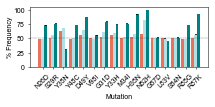

In [71]:
#plot
# create plot
n_groups = 16
#fig, ax = plt.subplots()
plt.figure(figsize=(3,1.5)) 
index = np.arange(n_groups)
bar_width = 0.28
x_axis = np.arange(len(posi))
rects1 = plt.bar(x_axis + bar_width, MA90, bar_width,
yerr = CH65['MA90err'],
color="#E8735C",
label='MA90')

rects2 = plt.bar(x_axis + 2*bar_width, G189E, bar_width,
yerr = CH65['G189Eerr'],
color="powderblue", label='G189E')

rects3 = plt.bar(x_axis + 3*bar_width, SI06, bar_width,
yerr = CH65['SI06err'],
color="teal",
label='SI06')

plt.xlabel('Mutation',fontsize=7)
plt.ylabel('% Frequency',fontsize=7,labelpad=0)
plt.title('',fontsize=8)
plt.xticks(x_axis + 2*bar_width, posi,fontsize=7,rotation=45)
plt.yticks([0,25,50,75,100],fontsize=7)
plt.axhline(y=50,linestyle='dashed',c='black',linewidth=0.25)
#plt.legend(loc='best',fontsize=5)
plt.tight_layout()
plt.savefig('images/ch65binders_mutfreq_1nM.png',dpi=1200,transparent=True)

## change in Kd by mutation position

In [72]:
import matplotlib
import matplotlib.colors as mcolors
plt.rcParams.update({'font.size': 7})
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams["xtick.major.size"] = 2
plt.rcParams["ytick.major.size"] = 2
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["ytick.major.width"] = 0.5

dMA90 = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/20221008_CH65_dKd_MA90.csv',dtype={'source':'str', 'target':'str'}))
dSI06 = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/20221008_CH65_dKd_SI06.csv',dtype={'source':'str', 'target':'str'}))
dG189E = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/20221008_CH65_dKd_G189E.csv',dtype={'source':'str', 'target':'str'}))
dMA90

,Mutation,deltaKd,Number of mutations,deltaKd_err,source,target,pos1,pos2,pos3,pos4,...,pos7,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16
0,N26D,-0.042660,0,0.069290,0000000000000000,1000000000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,N26D,-0.012470,1,0.049377,0000000000000001,1000000000000001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,N26D,-0.069864,1,0.064291,0000000000000010,1000000000000010,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,N26D,-0.049567,2,0.036706,0000000000000011,1000000000000011,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,N26D,-0.008116,1,0.088658,0000000000000100,1000000000000100,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524283,R87K,0.111468,14,0.051684,1111111111110110,1111111111110111,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0
524284,R87K,0.062280,13,0.032280,1111111111111000,1111111111111001,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
524285,R87K,0.129760,14,0.034485,1111111111111010,1111111111111011,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
524286,R87K,0.071300,14,0.036059,1111111111111100,1111111111111101,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_21575/1785656928.py:17: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


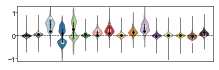

In [73]:
##MA90
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
colors = ['#121212','#808080','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','gold','#b15928','#4f1530']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Mutation", y="deltaKd", data=dMA90,scale='count',linewidth=0.25,palette=colors)
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
sns.scatterplot(x="Mutation", y="deltaKd", data=dMA90[(dMA90['source']=='0000000000000000')],color='white',s=10)
sns.scatterplot(x="Mutation", y="deltaKd", data=dMA90[(dMA90['source']=='0000001010100000')],color='gray',s=10)
sns.scatterplot(x="Mutation", y="deltaKd", data=dMA90[(dMA90['target']=='1111111111111111')],color='black',s=10)
ax.set_xticklabels(['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K'],rotation=45)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',
    pad=0,
    labelsize=7)
ax.set_xticks([])
ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_MA90_dKd.png',transparent=True, dpi=600,bbox_inches='tight')


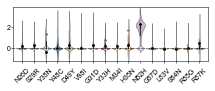

In [74]:
##SI06
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Mutation", y="deltaKd", data=dSI06,scale='count',linewidth=0.25,palette=colors)
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
sns.scatterplot(x="Mutation", y="deltaKd", data=dSI06[(dSI06['source']=='0000000000000000')],color='white',s=10)
sns.scatterplot(x="Mutation", y="deltaKd", data=dSI06[(dSI06['source']=='0000001010100000')],color='gray',s=10)
sns.scatterplot(x="Mutation", y="deltaKd", data=dSI06[(dSI06['target']=='1111111111111111')],color='black',s=10)
ax.set_xticklabels(['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K'],rotation=45)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',
    pad=0,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_SI06_dKd.png',transparent=True, dpi=600,bbox_inches='tight')


/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_21575/530729315.py:16: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


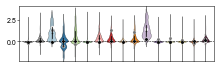

In [75]:
##G189E
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Mutation", y="deltaKd", data=dG189E,scale='count',linewidth=0.25,palette=colors)
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
sns.scatterplot(x="Mutation", y="deltaKd", data=dG189E[(dG189E['source']=='0000000000000000')],color='white',s=10)
sns.scatterplot(x="Mutation", y="deltaKd", data=dG189E[(dG189E['source']=='0000001010100000')],color='gray',s=10)
sns.scatterplot(x="Mutation", y="deltaKd", data=dG189E[(dG189E['target']=='1111111111111111')],color='black',s=10)
ax.set_xticklabels(['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K'],rotation=45)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',
    pad=0,
    labelsize=7)
ax.set_xticks([])
ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_G189E_dKd.png',transparent=True, dpi=600,bbox_inches='tight')


## change in Kd by number of other mutations present

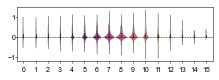

In [76]:
##MA90
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Number of mutations", y="deltaKd", data=dMA90,scale='count',linewidth=0.25,palette='plasma')
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',
    pad=0,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_MA90_dKd_num.png',transparent=True, dpi=600,bbox_inches='tight')


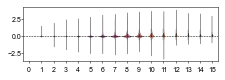

In [77]:
##SI06
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Number of mutations", y="deltaKd", data=dSI06,scale='count',linewidth=0.25,palette='plasma')
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',
    pad=0,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_SI06_dKd_num.png',transparent=True, dpi=600,bbox_inches='tight')


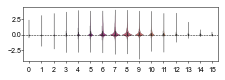

In [78]:
##G189E
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Number of mutations", y="deltaKd", data=dG189E,scale='count',linewidth=0.25,palette='plasma')
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',
    pad=0,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_G189E_dKd_num.png',transparent=True, dpi=600,bbox_inches='tight')


## as a line plot by each site

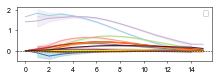

In [79]:
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.lineplot(x="Number of mutations", y="deltaKd", hue="Mutation",data=dG189E,linewidth=1,palette=colors)
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.title('', fontsize=10)
plt.legend('')
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_G189E_dKdline.png',transparent=True, dpi=600,bbox_inches='tight')

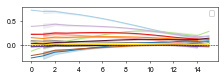

In [80]:
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.lineplot(x="Number of mutations", y="deltaKd", hue="Mutation",data=dMA90,linewidth=1,palette=colors)
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.title('', fontsize=10)
plt.legend('')
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_MA90_dKdline.png',transparent=True, dpi=600,bbox_inches='tight')

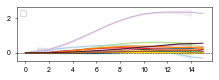

In [81]:
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.lineplot(x="Number of mutations", y="deltaKd", hue="Mutation",data=dSI06,linewidth=1,palette=colors)
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.title('', fontsize=10)
plt.legend('')
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_SI06_dKdline.png',transparent=True, dpi=600,bbox_inches='tight')

## do some statistics

In [82]:
#do a two-sided t-test to see if mean is different from zero
MA90_dKd_mean = []
MA90_dKd_sem = []
#MA90
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
for mutation_name in mutation_names:
    vals_1 = np.array(dMA90['deltaKd'][dMA90['Mutation']==mutation_name])
    mean = np.nanmean(vals_1)
    sem = st.sem(vals_1, nan_policy='omit')
    MA90_dKd_mean.append(mean)
    MA90_dKd_sem.append(sem)
    vals_2 = 0
    n1 = len(np.where(~np.isnan(vals_1))[0])
    n2 = len(np.where(~np.isnan(vals_2))[0])
    tstat,pval = st.ttest_1samp(vals_1,vals_2,nan_policy='omit')
    if pval < 0.0001/16:
        lab = '***'
    elif pval < 0.001/16:
        lab = '**'
    elif pval < 0.01/16:
        lab = '*'
    else:
        lab = 'ns'
    print(mutation_name,tstat,pval,n1,n2,lab)
print(MA90_dKd_mean)
print(MA90_dKd_sem)

N26D -17.825805045943973 9.628258110470082e-71 32762 1 ***
S29R 136.14651772045428 0.0 32762 1 ***
Y35N 405.62349337965907 0.0 32762 1 ***
Y48C -4.614267494674719 3.959769539578804e-06 32762 1 ***
D49Y 126.9569671957062 0.0 32762 1 ***
V98I 41.465811813696455 0.0 32762 1 ***
G31D 223.01055137881585 0.0 32762 1 ***
Y33H 292.0230780493718 0.0 32762 1 ***
M34I 34.47203507514914 7.959358027724868e-256 32762 1 ***
H35N 215.76023083604906 0.0 32762 1 ***
N52H 352.66970631432093 0.0 32762 1 ***
G57D 23.370455136365923 8.180262474664704e-120 32762 1 ***
L83V 77.78615732226024 0.0 32762 1 ***
S84N 18.8884811776572 3.7415024666990575e-79 32762 1 ***
R85G -74.54155875621568 0.0 32762 1 ***
R87K 188.2355251551084 0.0 32762 1 ***
[-0.005957360083280793, 0.051100619401427114, 0.47380602958468326, -0.008687338992129657, 0.24361377767788295, 0.013458224943587687, 0.14792118615477376, 0.24359472210664954, 0.015516902697274683, 0.16380507670480673, 0.3551461546317764, 0.010069659761285507, 0.02765886963

In [83]:
#do a two-sided t-test to see if mean is different from zero
SI06_dKd_mean = []
SI06_dKd_sem = []
#SI06
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
for mutation_name in mutation_names:
    vals_1 = np.array(dSI06['deltaKd'][dSI06['Mutation']==mutation_name])
    mean = np.nanmean(vals_1)
    sem = st.sem(vals_1, nan_policy='omit')
    SI06_dKd_mean.append(mean)
    SI06_dKd_sem.append(sem)
    vals_2 = 0
    n1 = len(np.where(~np.isnan(vals_1))[0])
    n2 = len(np.where(~np.isnan(vals_2))[0])
    tstat,pval = st.ttest_1samp(vals_1,vals_2,nan_policy='omit')
    if pval < 0.0001/16:
        lab = '***'
    elif pval < 0.001/16:
        lab = '**'
    elif pval < 0.01/16:
        lab = '*'
    else:
        lab = 'ns'
    print(mutation_name,tstat,pval,n1,n2,lab)
print(SI06_dKd_mean)
print(SI06_dKd_sem)

N26D 87.10680817040144 0.0 31906 1 ***
S29R 97.38064573718358 0.0 31895 1 ***
Y35N 109.32658204447746 0.0 31857 1 ***
Y48C 7.287617587525555 3.22804532488476e-13 31854 1 ***
D49Y 102.67592628846334 0.0 31874 1 ***
V98I 42.8940700684015 0.0 31924 1 ***
G31D 93.67855157708384 0.0 31885 1 ***
Y33H 98.23771517570576 0.0 31862 1 ***
M34I 66.56935770146958 0.0 31889 1 ***
H35N 111.65218522334102 0.0 31870 1 ***
N52H 335.8117937931818 0.0 31851 1 ***
G57D 38.365036937168696 7.382333337e-315 31900 1 ***
L83V 12.037726890458517 2.6578209068255404e-33 31914 1 ***
S84N 14.618909919980853 3.047696983874228e-48 31935 1 ***
R85G 29.178359692387264 9.79554655291685e-185 31914 1 ***
R87K 114.26736914874178 0.0 31876 1 ***
[0.11939767378584182, 0.1552315881908023, 0.386927671882213, 0.02475919289946073, 0.4401358003596674, 0.04278261731822638, 0.15523256393342752, 0.2532589723149351, 0.09676181004062794, 0.3132192046852181, 1.6678617540988971, 0.047141828513463, 0.011895654667412329, 0.0139269446716117

In [84]:
#do a two-sided t-test to see if mean is different from zero
G189E_dKd_mean = []
G189E_dKd_sem = []
#G189E
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
for mutation_name in mutation_names:
    vals_1 = np.array(dG189E['deltaKd'][dG189E['Mutation']==mutation_name])
    mean = np.nanmean(vals_1)
    sem = st.sem(vals_1, nan_policy='omit')
    G189E_dKd_mean.append(mean)
    G189E_dKd_sem.append(sem)
    vals_2 = 0
    n1 = len(np.where(~np.isnan(vals_1))[0])
    n2 = len(np.where(~np.isnan(vals_2))[0])
    tstat,pval = st.ttest_1samp(vals_1,vals_2,nan_policy='omit')
    if pval < 0.0001/16:
        lab = '***'
    elif pval < 0.001/16:
        lab = '**'
    elif pval < 0.01/16:
        lab = '*'
    else:
        lab = 'ns'
    print(mutation_name,tstat,pval,n1,n2,lab)
print(G189E_dKd_mean)
print(G189E_dKd_sem)

N26D -27.136172647637103 2.627482486899318e-160 31372 1 ***
S29R 139.88828244593935 0.0 31126 1 ***
Y35N 225.07951469929603 0.0 31075 1 ***
Y48C 1.395433671013488 0.1628950752319696 31075 1 ns
D49Y 132.07326520381625 0.0 31133 1 ***
V98I -17.79667321495359 1.6674775166813862e-70 31372 1 ***
G31D 168.77603114419432 0.0 31075 1 ***
Y33H 154.32027215732685 0.0 31164 1 ***
M34I 66.62798976871208 0.0 31290 1 ***
H35N 122.1321657699349 0.0 31128 1 ***
N52H 280.65478397301706 0.0 31075 1 ***
G57D 26.39027258212192 8.17978499507017e-152 31271 1 ***
L83V 1.182343764432396 0.23707828915818768 31369 1 ns
S84N 15.877128679915147 1.515796036206498e-56 31392 1 ***
R85G -20.752475214679148 5.093051111569507e-95 31282 1 ***
R87K 140.0885765198515 0.0 31241 1 ***
[-0.02746734637846166, 0.29188214468944773, 1.0725420858709638, 0.006276884909245876, 0.6420289181932, -0.017340653721671453, 0.4992564397572357, 0.3830654489449036, 0.08265663604226486, 0.37927545602331453, 1.3584962382184067, 0.0339180921986

## make an output file to plot with expression data elsewhere

In [85]:
array = zip(mutation_names,MA90_dKd_mean,MA90_dKd_sem,SI06_dKd_mean,SI06_dKd_sem,G189E_dKd_mean,G189E_dKd_sem)
summary = pd.DataFrame(data = array, columns = ['mutation_names','MA90_dKd_mean','MA90_dKd_sem','SI06_dKd_mean','SI06_dKd_sem','G189E_dKd_mean','G189E_dKd_sem'])
summary.to_csv('../../Kd_Inference/results_CH65/Kd_processed/dKd_summary.csv')
summary

,mutation_names,MA90_dKd_mean,MA90_dKd_sem,SI06_dKd_mean,SI06_dKd_sem,G189E_dKd_mean,G189E_dKd_sem
0,N26D,-0.005957,0.000334,0.119398,0.001371,-0.027467,0.001012
1,S29R,0.051101,0.000375,0.155232,0.001594,0.291882,0.002087
2,Y35N,0.473806,0.001168,0.386928,0.003539,1.072542,0.004765
3,Y48C,-0.008687,0.001883,0.024759,0.003397,0.006277,0.004498
4,D49Y,0.243614,0.001919,0.440136,0.004287,0.642029,0.004861
5,V98I,0.013458,0.000325,0.042783,0.000997,-0.017341,0.000974
6,G31D,0.147921,0.000663,0.155233,0.001657,0.499256,0.002958
7,Y33H,0.243595,0.000834,0.253259,0.002578,0.383065,0.002482
8,M34I,0.015517,0.000450,0.096762,0.001454,0.082657,0.001241
9,H35N,0.163805,0.000759,0.313219,0.002805,0.379275,0.003105


## plot correlations in dKd between antigens

In [86]:
toplot = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/dKd_summary.csv'))
toplot

,Unnamed: 0,mutation_names,MA90_dKd_mean,MA90_dKd_sem,SI06_dKd_mean,SI06_dKd_sem,G189E_dKd_mean,G189E_dKd_sem
0,0,N26D,-0.005957,0.000334,0.119398,0.001371,-0.027467,0.001012
1,1,S29R,0.051101,0.000375,0.155232,0.001594,0.291882,0.002087
2,2,Y35N,0.473806,0.001168,0.386928,0.003539,1.072542,0.004765
3,3,Y48C,-0.008687,0.001883,0.024759,0.003397,0.006277,0.004498
4,4,D49Y,0.243614,0.001919,0.440136,0.004287,0.642029,0.004861
5,5,V98I,0.013458,0.000325,0.042783,0.000997,-0.017341,0.000974
6,6,G31D,0.147921,0.000663,0.155233,0.001657,0.499256,0.002958
7,7,Y33H,0.243595,0.000834,0.253259,0.002578,0.383065,0.002482
8,8,M34I,0.015517,0.000450,0.096762,0.001454,0.082657,0.001241
9,9,H35N,0.163805,0.000759,0.313219,0.002805,0.379275,0.003105


0.670854045502088


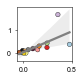

In [87]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
colors = ['#121212','#808080','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','gold','#b15928','#4f1530']

corr, _ = pearsonr(toplot['MA90_dKd_mean'], toplot['SI06_dKd_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['MA90_dKd_mean'], toplot['SI06_dKd_mean'])
plt.figure(figsize=(1,1))
ax = sns.scatterplot(x='MA90_dKd_mean', y='SI06_dKd_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['MA90_dKd_sem'],xerr=toplot['SI06_dKd_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='MA90_dKd_mean', y='SI06_dKd_mean',data=toplot, scatter=False, ax=ax,color='gray')
# plt.xlim(-0.1,1.5)
# plt.ylim(-0.1,1.5)
# plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
plt.xlabel('',fontsize=7,labelpad=0.5)
plt.ylabel('',fontsize=7,labelpad=0.5)
# plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
# plt.yticks(ticks=[0,1,2,3],labels=['0','1','2','3'],fontsize=7)
plt.savefig('images/CH65_MA90_SI06.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

0.9338339580250712


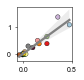

In [88]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
colors = ['#121212','#808080','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','gold','#b15928','#4f1530']

corr, _ = pearsonr(toplot['MA90_dKd_mean'], toplot['G189E_dKd_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['MA90_dKd_mean'], toplot['G189E_dKd_mean'])
plt.figure(figsize=(1,1))
ax = sns.scatterplot(x='MA90_dKd_mean', y='G189E_dKd_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['MA90_dKd_sem'],xerr=toplot['G189E_dKd_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='MA90_dKd_mean', y='G189E_dKd_mean',data=toplot, scatter=False, ax=ax,color='gray')
# plt.xlim(-0.1,1.5)
# plt.ylim(-0.1,1.5)
# plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
plt.xlabel('',fontsize=7,labelpad=0.5)
plt.ylabel('',fontsize=7,labelpad=0.5)
# plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
# plt.yticks(ticks=[0,1,2,3],labels=['0','1','2','3'],fontsize=7)
plt.savefig('images/CH65_MA90_G189E.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

0.8525701688788883


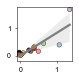

In [89]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
colors = ['#121212','#808080','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','gold','#b15928','#4f1530']

corr, _ = pearsonr(toplot['G189E_dKd_mean'], toplot['SI06_dKd_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['G189E_dKd_mean'], toplot['SI06_dKd_mean'])
plt.figure(figsize=(1,1))
ax = sns.scatterplot(x='G189E_dKd_mean', y='SI06_dKd_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['G189E_dKd_sem'],xerr=toplot['SI06_dKd_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='G189E_dKd_mean', y='SI06_dKd_mean',data=toplot, scatter=False, ax=ax,color='gray')
# plt.xlim(-0.1,1.5)
# plt.ylim(-0.1,1.5)
# plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
plt.xlabel('',fontsize=7,labelpad=0.5)
plt.ylabel('',fontsize=7,labelpad=0.5)
# plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
# plt.yticks(ticks=[0,1,2,3],labels=['0','1','2','3'],fontsize=7)
plt.savefig('images/CH65_G189E_SI06.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)